# Cross Sell Fintech Product (Binary classification)
__Author: Mohammed Salman__

# Summary of the Assignment:

__a) Insights from EDA__
1. Diversity balanced dataset (male/female) no gender impact.
2. Almost all customers have a driving lisence.
3. All customers that were not previously insured were interested.
4. Significant majority of interested customers had their vehicle for 1-2 years.
5. Customers who had damaged vehicle in the past, almost all wanted to get insured.
6. More older customers of 40+ age group were the ones who were interested in vehicle insurance.
7. Interested customers paid Rs. 1000-2000 more Insurance Premium than customers who weren't.
8. Both interested and not interested customers had extremely similar tenure at this insurance company.

__b) Questions to ask Business__

1. To check with domain expert/company representative if Rs. 5.4Lakh/2.3k annual premium is legit or not?
2. Does your company cover person of age 85/20 yrs?
3. How will be end users of this solution?


In [704]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
import random
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as m
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, \
recall_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBClassifier, plot_tree
import joblib
import lime
import lime.lime_tabular
np.set_printoptions(suppress=True)

# Reading Train data

In [682]:
train_df = pd.read_csv('train.csv')

In [683]:
train_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

#### To check if  ID is unique: (for duplicate records of a person)

In [684]:
if len(set(train_df['id'])) == len(train_df['id']) and 'id' in train_df.columns:
    del train_df['id']

In [685]:
train_df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0         Male   44                1         28.0                   0   
1         Male   76                1          3.0                   0   
2         Male   47                1         28.0                   0   
3         Male   21                1         11.0                   1   
4       Female   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104    Male   74                1         26.0                   1   
381105    Male   30                1         37.0                   1   
381106    Male   21                1         30.0                   1   
381107  Female   68                1         14.0                   0   
381108    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 11 columns]

# Checks for missing values:

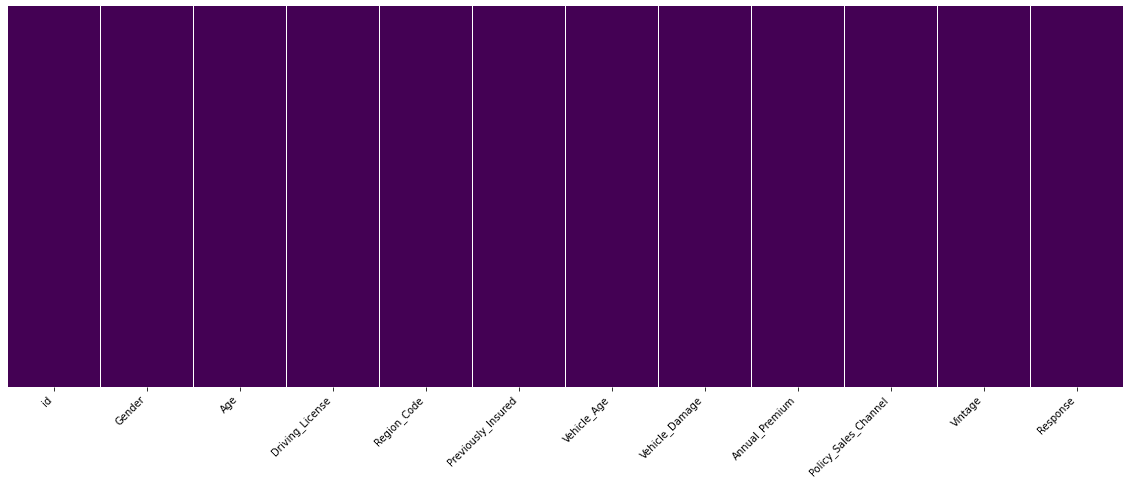

In [4]:
plt.figure(figsize=(20,7))

g = sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
f = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [5]:
(train_df.isna().sum()*100)/len(train_df)

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

### Identify categorical and numerical features: 

In [483]:
# Consider it a category if there are 20 or less unique values for first glance
thresh = 53

if [col for col in train_df.columns if len(train_df[col].unique()) <=thresh ]:
     cat_var = [col for col in train_df.columns if len(train_df[col].unique()) <=thresh and col != 'Response']  
if [col for col in train_df.columns if len(train_df[col].unique()) > thresh]:
     num_var = [col for col in train_df.columns if len(train_df[col].unique()) > thresh and col != 'Response']
        
print('Categorical columns are: ', cat_var, len(cat_var))
print('\n\nNumerical columns are: ', num_var, len(num_var))

Categorical columns are:  ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'] 6


Numerical columns are:  ['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'] 4


In [20]:
##### plot styling #####
sns.set_style("whitegrid")
sns.set_palette("bright")

<AxesSubplot:xlabel='Response', ylabel='Count'>

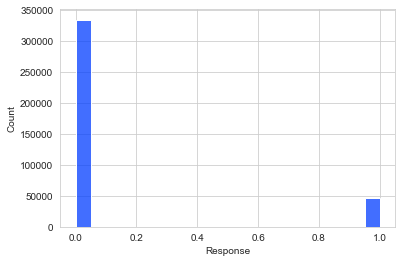

In [10]:
sns.histplot(data=train_df, x="Response")

In [11]:
100*len(train_df[train_df['Response'] == 0]) / len(train_df), 100*len(train_df[train_df['Response'] == 1]) / len(train_df)

(87.74366388618479, 12.256336113815207)

#### Summary of above graph:
* Customer not interested stands at ~88%  and customers interested ~12%, only 1 in 10 are interested based on past yr data
* Imbalanced dataset

# Exploratory Data Analysis:

In [681]:
train_df.describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2630.000000              1.000000      10.000000       0.000000  
25%      24405.000000             29.000000      82.000000       0.000000  
50%      31669.000000            133.000000     154.000000       0.000000  
75%      39400.000000            152.000000     227.000000       0.000000  
max     540165.000000            163.000000     299.000000       1.000000

#### Summary of the description of stats:

1. Age: Are 20/85 year olds valid ages that your company sells insurance to?
2. Annual Premium: Can Rs. 2600 or Rs. 5,40,000 be valid annual premiums?

## Univariate analysis on categorical data:

In [621]:
def plot_categorical(col, target_var='Response'):
    '''helper function to plot categorical vs categorical variable(target)
    '''
    if col==target_var:
        return
    labels = [k for k in train_df[col].unique()]
    response0 = [len(train_df[(train_df[col]==k) & (train_df[target_var]==0) ]) for k in train_df[col].unique()]
    response1 = [len(train_df[(train_df[col]==k) & (train_df[target_var]==1) ]) for k in train_df[col].unique()]
    plt.figure(figsize=(12,7))
    plt.bar(labels, response0, label='Response = 0')
    plt.bar(labels, response1, bottom=response0,  label='Total')
    plt.ylabel('Customers')
    plt.title('Scores by ' + str(col))
    plt.legend()
    plt.show()

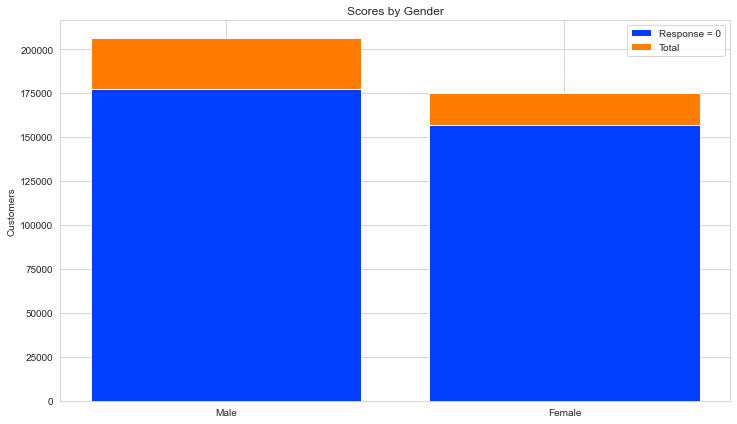

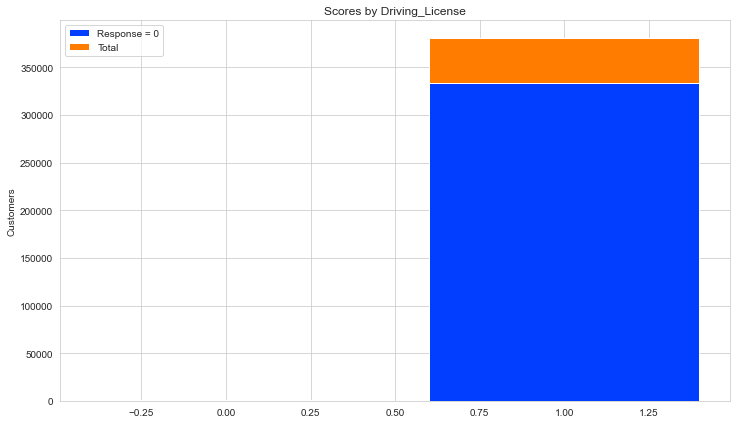

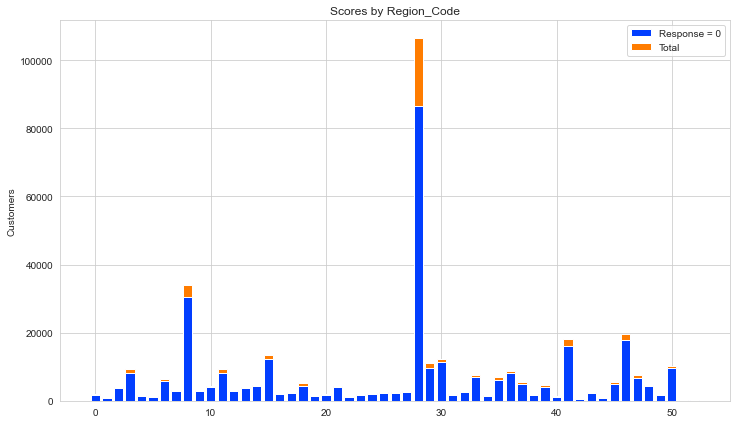

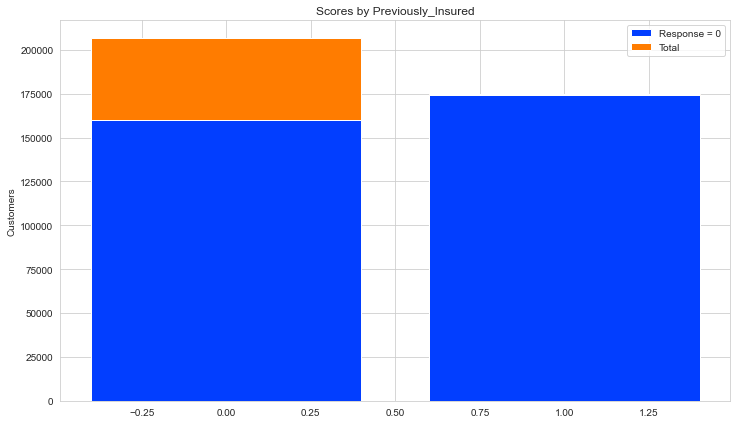

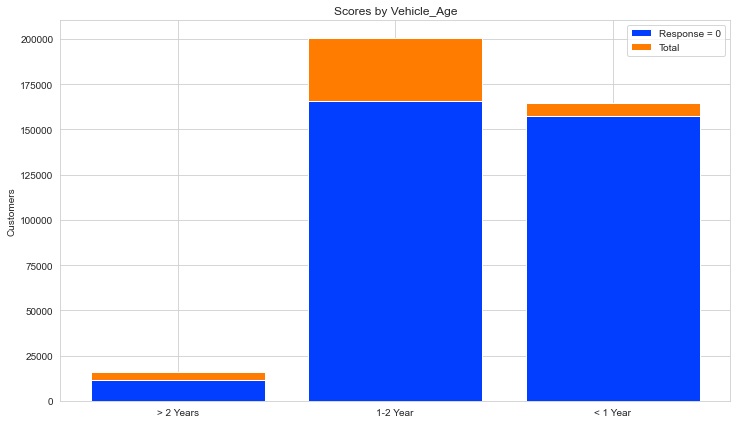

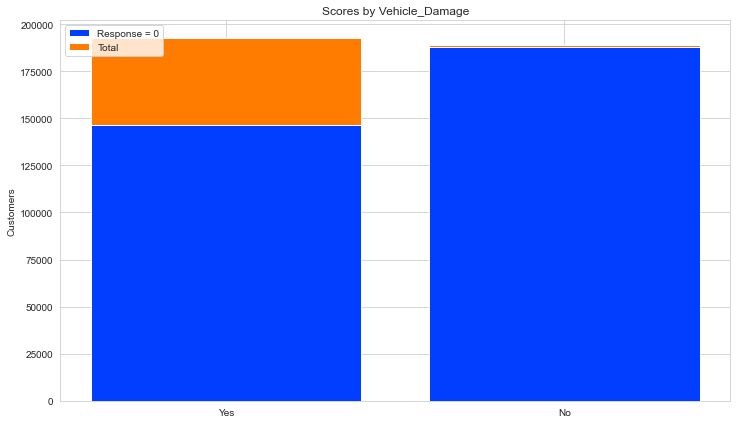

In [13]:
for categorical_variable in cat_var:
    plot_categorical(categorical_variable)

#### Summary of above categorical variables:
* Gender:
    - Almost balanced male and female customers.
    - Gender is proportional to imbalanced customers interested (~12%) 

* Driving License:
    - Almost all customers have a driving lisence
    - Proportional to interested customers (~12%)

* Previously Insured:
    - Customers who werent previously insured, were interested.
    
* Vehicle Age:
    - Significant majority of interested customers had their vehicle for 1-2 years 
    - For other years, there are customers, but insignificant.

* Vehicle Damage:
    - Customers who had damaged vehicle in the past, almost all wanted to get insured.

    
* Region Code:
    - See below



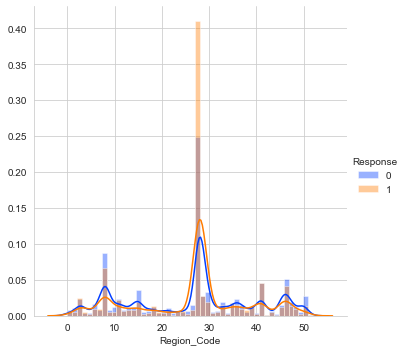

{28.0: 19917,
 8.0: 3257,
 41.0: 2224,
 46.0: 2032,
 29.0: 1365,
 3.0: 1181,
 11.0: 1041,
 15.0: 958,
 30.0: 900,
 35.0: 865,
 33.0: 760,
 36.0: 703,
 18.0: 678,
 47.0: 652,
 50.0: 642,
 45.0: 615,
 39.0: 574,
 48.0: 477,
 6.0: 439,
 37.0: 436,
 7.0: 432,
 14.0: 422,
 38.0: 389,
 13.0: 364,
 24.0: 342,
 12.0: 312,
 21.0: 303,
 23.0: 300,
 2.0: 287,
 4.0: 285,
 10.0: 263,
 9.0: 253,
 19.0: 250,
 43.0: 244,
 32.0: 239,
 20.0: 223,
 27.0: 209,
 31.0: 197,
 26.0: 187,
 17.0: 184,
 0.0: 174,
 40.0: 153,
 5.0: 148,
 49.0: 137,
 16.0: 134,
 34.0: 126,
 1.0: 109,
 25.0: 107,
 22.0: 83,
 42.0: 44,
 44.0: 33,
 52.0: 33,
 51.0: 28}

In [14]:
plt.figure(figsize=(12,7))
sns.FacetGrid(train_df, hue = "Response", size = 5).map(sns.distplot, "Region_Code").add_legend()
plt.show()
distribution_region_code = {k:len(train_df[(train_df['Response']==1) & (train_df['Region_Code']==k)]) for k in train_df['Region_Code'].unique()}
distribution_region_code = {k: v for k, v in sorted(distribution_region_code.items(), key=lambda item: item[1], reverse=True)}
distribution_region_code

In [15]:
print(100*distribution_region_code[28.0]/sum(distribution_region_code.values()))
print(100*sum(list(distribution_region_code.values())[:5])/sum(distribution_region_code.values()))

42.639691714836225
61.64632840933419


#### Summary of Region Code:
- Over 40% of the interested customers were just from Region code:28
- Over 60% of the interested customers were from Region codes: 28.0, 8.0, 41.0, 46.0, 29.0

## Univariate analysis on numerical data:

In [622]:
def numerical_outlier(col, target_var='Response'):
    print('Medians for Interested and non-interested customers:')
    print(train_df[train_df[target_var] == 1][col].median(),  train_df[train_df[target_var] == 0][col].median())
    print('Averages for Interested and non-interested customers:')
    print(train_df[train_df[target_var] == 1][col].mean(),  train_df[train_df[target_var] == 0][col].mean())
    plt.figure(figsize=(12,7))
    sns.boxplot(x=target_var, y=col, data=train_df, palette='winter', whis=1.5)
    plt.title(col)
    plt.show()
    
    sns.FacetGrid(train_df, hue = target_var, size = 8).map(sns.distplot, col).add_legend()
    plt.show()

Medians for Interested and non-interested customers:
43.0 34.0
Averages for Interested and non-interested customers:
43.435559837293944 38.17822720761725


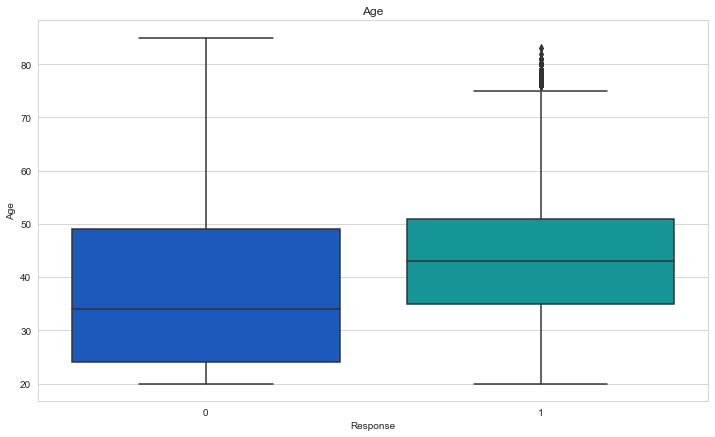

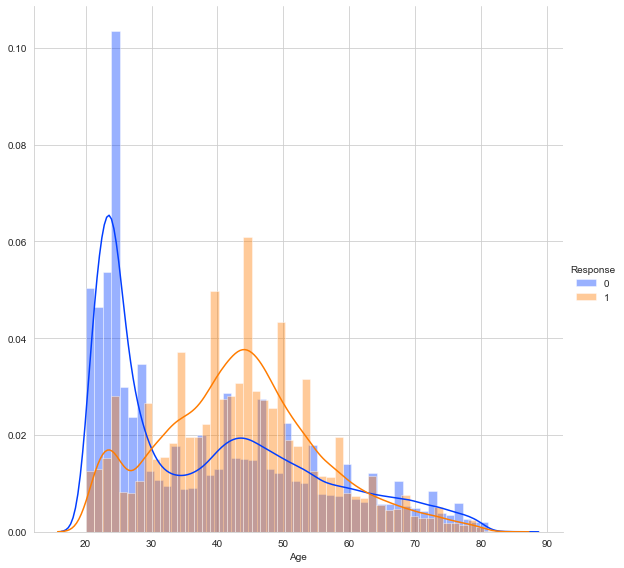

Medians for Interested and non-interested customers:
33002.0 31504.0
Averages for Interested and non-interested customers:
31604.092742453435 30419.16027559891


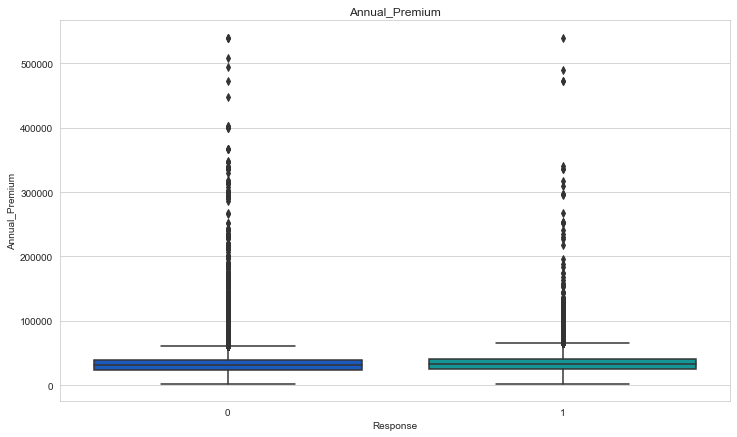

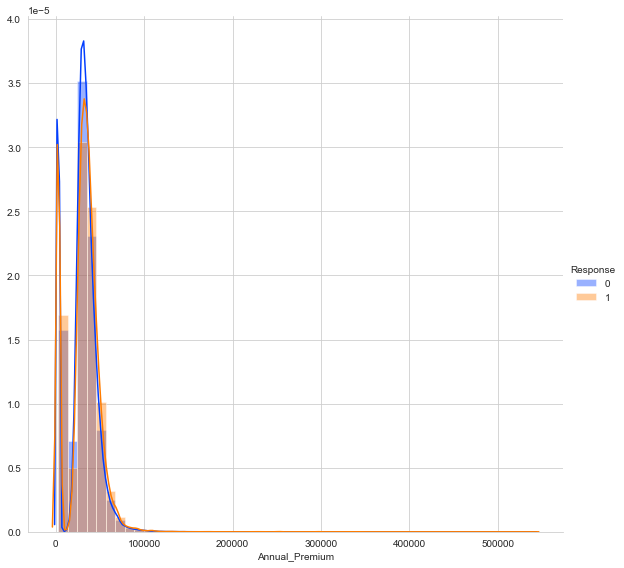

Medians for Interested and non-interested customers:
124.0 152.0
Averages for Interested and non-interested customers:
91.86908584885464 114.85104022440258


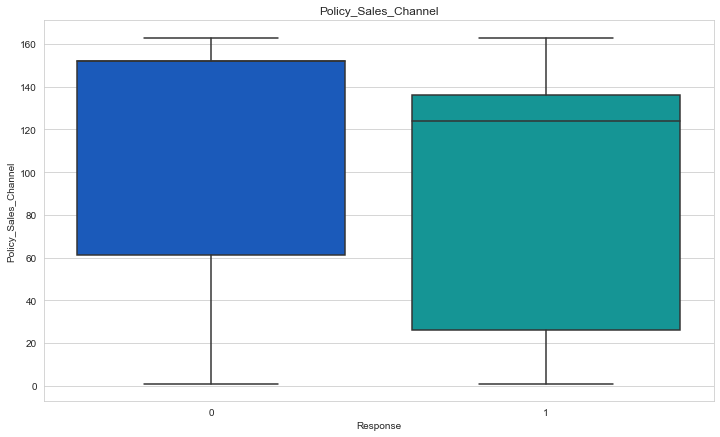

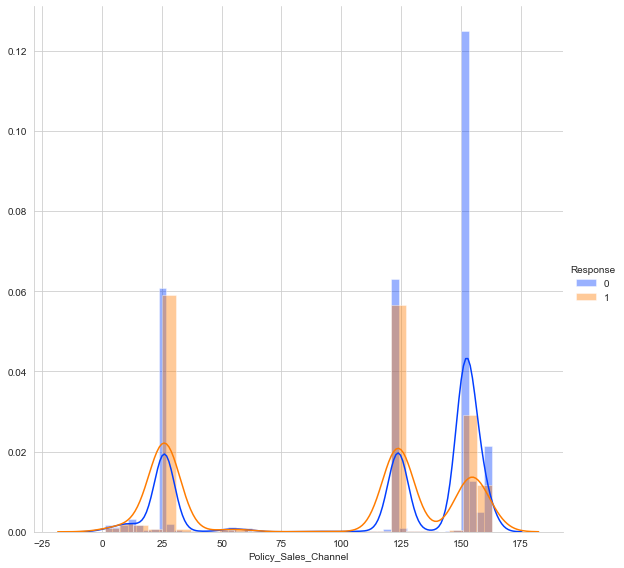

Medians for Interested and non-interested customers:
154.0 154.0
Averages for Interested and non-interested customers:
154.11224577178334 154.38024336197176


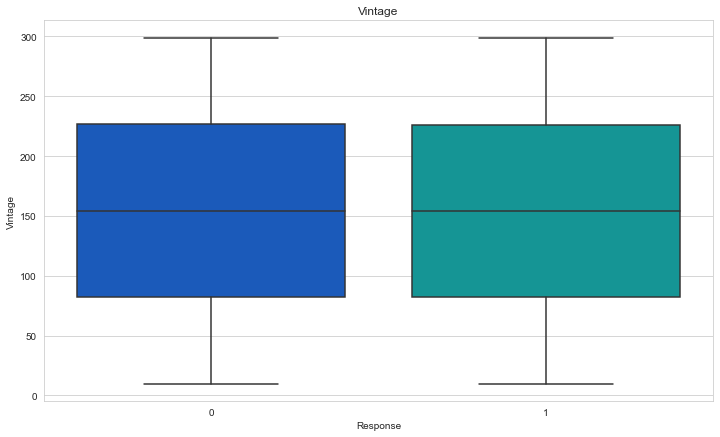

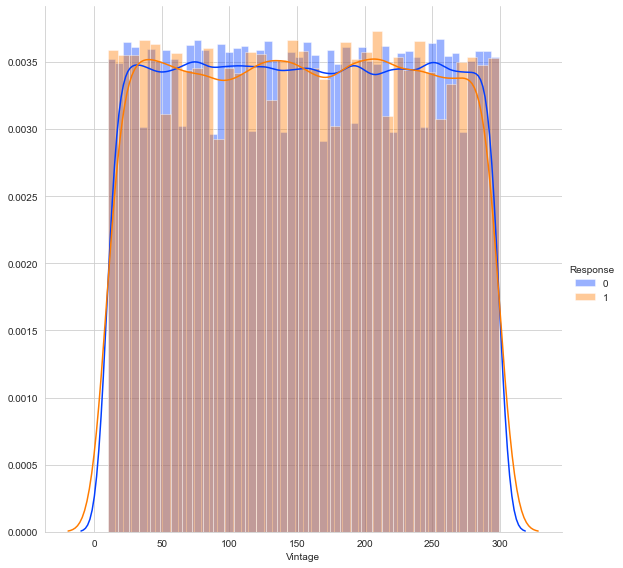

In [17]:
for numerical_var in num_var:
    numerical_outlier(numerical_var)

#### Summary of Numerical variables:

* Age:
    - More older customers of 40+ age group were the ones who were interested in vehicle insurance
    
* Insurance Premium:
    - Interested customers paid Rs. 1000-2000 more than customers who weren't.
    
* Vintage:
    - Both interested and not interested customers had extremely similar tenure at this insurance company.
    
* Policy Sales Channel
    - Higher anonymized channel code was given to interested customers, difficult to draw insight due to anonymaty 
    
-No outliers as ranges are valid, but to check with domain expert/company representative if 5.4Lakh annual premium is legit or not. Does your company cover person of age 85 yrs?

In [122]:
max(train_df['Annual_Premium']), max(train_df['Age'])

(540165.0, 85)

# Bivariate Analysis

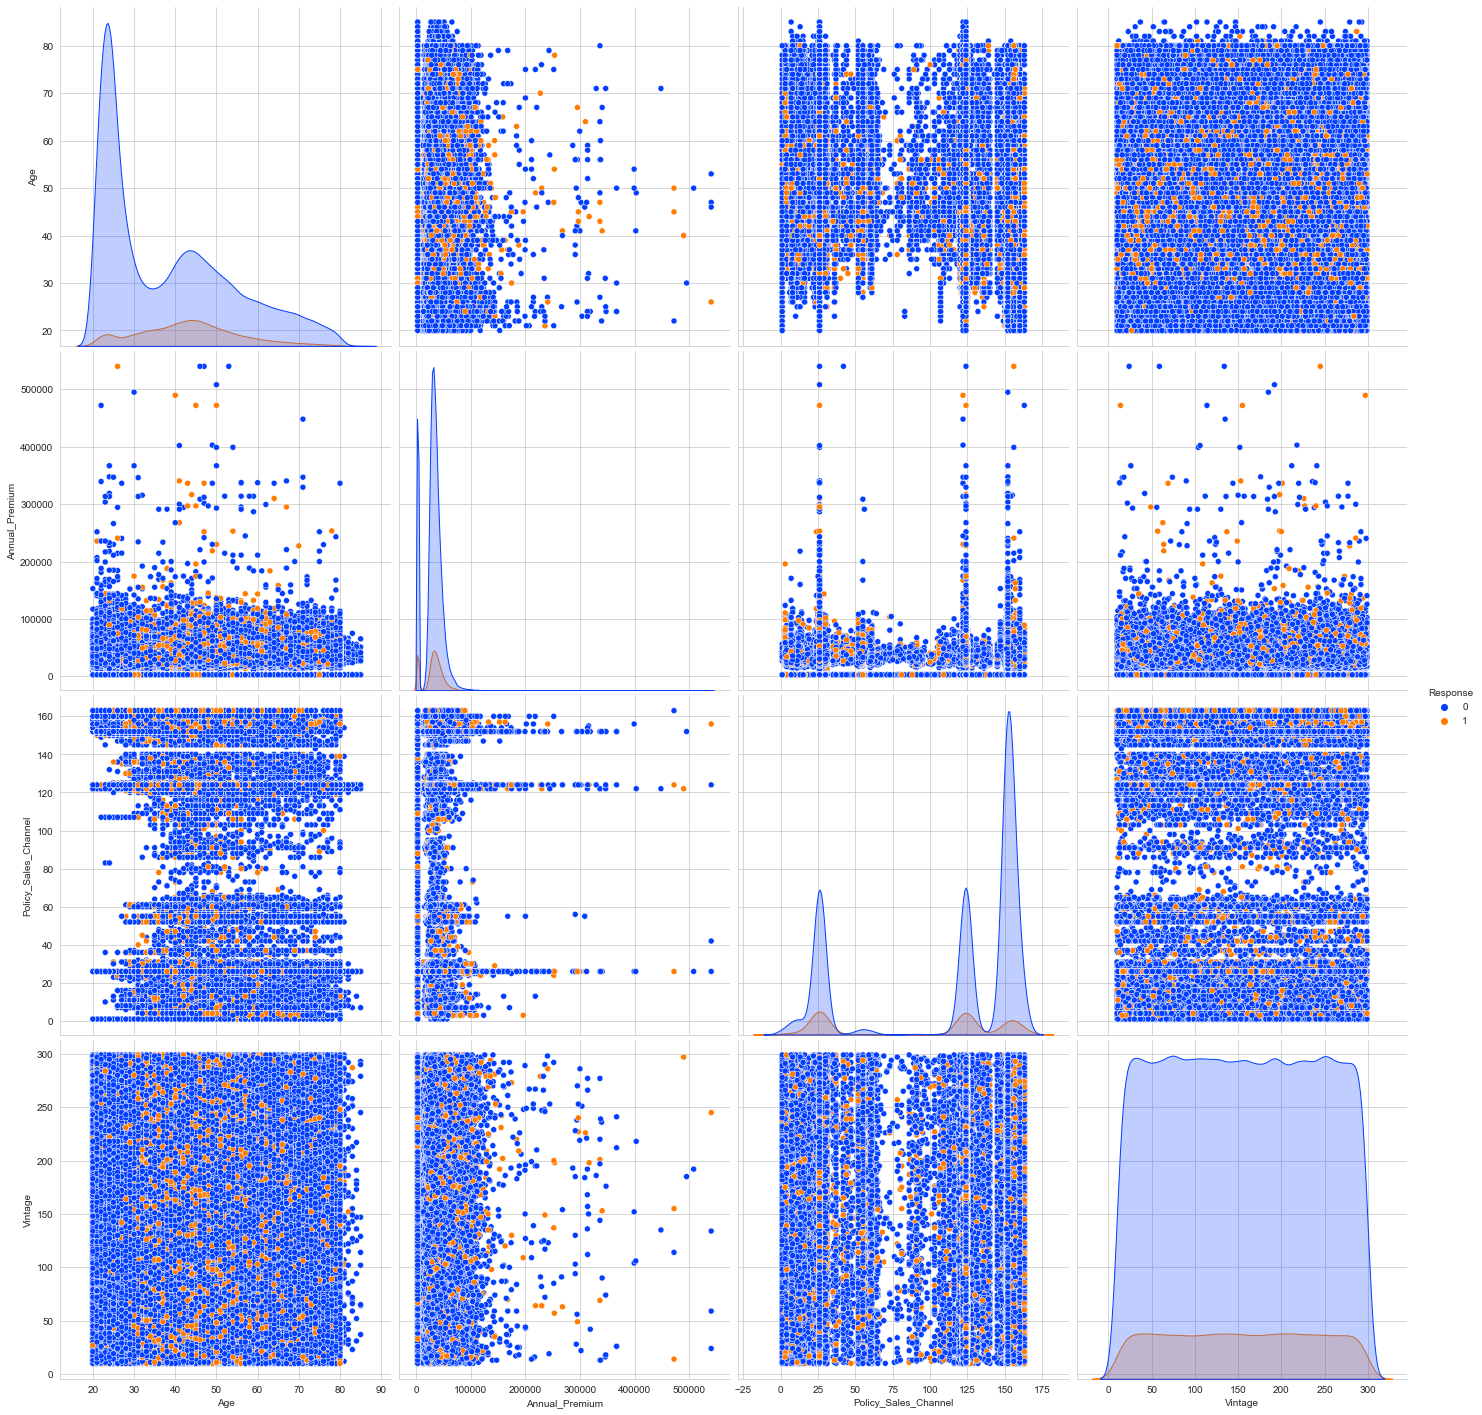

In [18]:
sns.pairplot(train_df[num_var+['Response']], hue = 'Response', size = 5)
plt.show()

#### Summary of pair plot:

- There seems to be no linear relationship between the numerical features

## Correlation plot:

<AxesSubplot:>

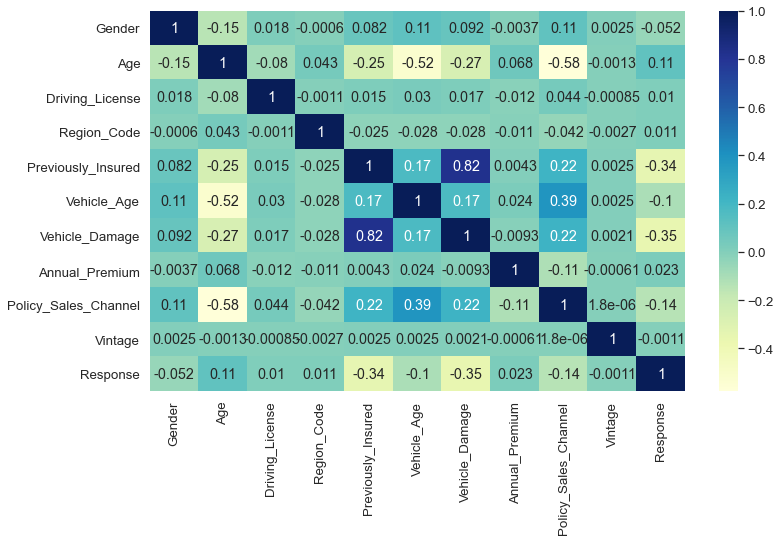

In [137]:
corr_df = train_df.copy()
corr_df['Gender'] = corr_df['Gender'].replace(['Male','Female'],[0, 1])
corr_df['Vehicle_Age'] = corr_df['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
corr_df['Vehicle_Damage'] = corr_df['Vehicle_Damage'].replace(['Yes','No'],[0, 1])
plt.figure(figsize=(12,7))
sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)

#### Summary of matrix:

- Vehicle Damage and Previously_Insured are highly correlated with each other, keeping Vehicle Damage as its more related with Response

## Splitting to train and dev(cv):
* __Stratified sampling to get proportional on classes in y vector.__

In [686]:
target_names = ['Not Interested' , 'Interested']
all_features = train_df.columns.difference(['Response'])

In [687]:
X = train_df[all_features]
y = train_df.Response.values
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [688]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)

(342998, 10) (342998,)
(38111, 10) (38111,)


In [562]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [563]:
train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

#### Helper functions for building models:

# Building pipeline for : Vectorizing features and Modeling:



In [16]:
def plot_rocCurve(gt, preds_proba, model):
    
    fpr, tpr, thresholds = roc_curve(gt, preds_proba)
    print(roc_auc_score(gt, preds_proba))
    plt.plot([0,1], [0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.', label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    return fpr, tpr, thresholds

In [17]:
def plot_confMatrix(gt, preds):
    conf = confusion_matrix(gt, preds)
    df_cm = pd.DataFrame(conf, columns=['Not Interested' , 'Interested'], index = ['Not Interested', 'Interested'])
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (8,5))
    sns.set(font_scale=1.2)
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14} , fmt='d')
    plt.show()

In [18]:
def best_threshold(fpr, tpr, thresholds):
    return thresholds[np.argmax(tpr - fpr)]

In [19]:
def proba_to_preds(proba, threshold):
    y_pred = [1 if x >= threshold else 0 for x in proba]
    return y_pred


In [691]:
full_pipeline = ColumnTransformer([("NumericalFeatures", StandardScaler(), 
                                    num_var),
                                   ("CategoricalFeatures", OneHotEncoder(handle_unknown='ignore'), 
                                    cat_var),])

In [692]:

X_train = full_pipeline.fit_transform(X_train)
X_cv = full_pipeline.transform(X_cv)

## Fixing problem of imbalanced class: (Using Oversampling)
    1. Undersampling (when removing excess data points to balance, there can be huge amounts of information lost)
    2. Oversampling 
    3. Combination of the above proves to be useful


## Hyper parameter tuning (by Grid search) for each model was done by 5-3 fold cross validation on train data and best model was picked from cross validation data (hold out)

### Building a baseline without feature engineering

![title](TCV.png)

### Probabilistic interpretation: Logistric Regression:

In [693]:
param_grid = {"alpha":[0.0001, 0.001, 0.01, 0.1]} # This alpha is the learning rate in the update function

Lr = linear_model.SGDClassifier(loss='log', random_state=42)


grid_search = GridSearchCV(Lr, param_grid, cv = 5, scoring='roc_auc')
grid_pipeline = Pipeline(steps=[('gridSearch', grid_search)])
grid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gridSearch',
                 GridSearchCV(cv=5,
                              estimator=SGDClassifier(loss='log',
                                                      random_state=42),
                              param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
                              scoring='roc_auc'))])

In [694]:
Lr = linear_model.SGDClassifier(loss='log', random_state=42, alpha=grid_pipeline['gridSearch'].best_params_['alpha'])
trained_pipeline = Pipeline(steps=[('log-reg classifier', Lr)])
trained_pipeline.fit(X_train, y_train)

Pipeline(steps=[('log-reg classifier',
                 SGDClassifier(alpha=0.001, loss='log', random_state=42))])

#### Predictions:

In [695]:
y_pred_train_proba = trained_pipeline.predict_proba(X_train)[:, 1]
y_pred_cv_proba = trained_pipeline.predict_proba(X_cv)[:, 1]

In [696]:
m.style.use('seaborn-bright')

0.8449542773337266


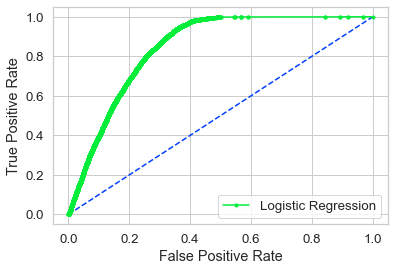

In [697]:
fpr, tpr, thresholds = plot_rocCurve(y_cv, y_pred_cv_proba, model='Logistic Regression')

In [698]:
best_threshold(fpr, tpr, thresholds)

0.14397860565640813

In [699]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

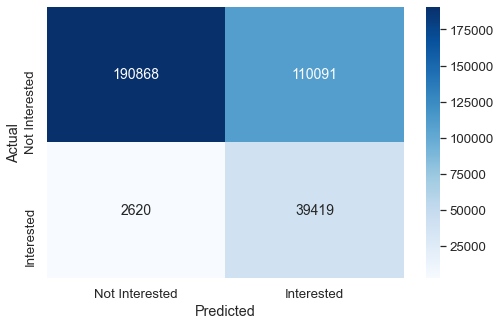

In [700]:
plot_confMatrix(y_train, y_train_pred)

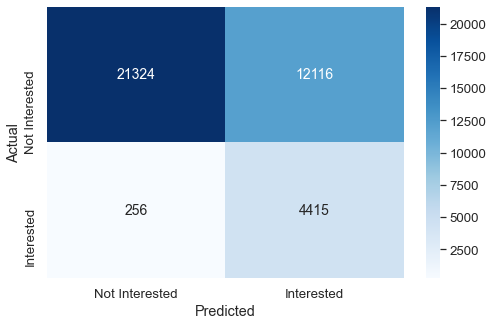

In [701]:
plot_confMatrix(y_cv, y_cv_pred)

In [702]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.99      0.63      0.77    300959
    Interested       0.26      0.94      0.41     42039

      accuracy                           0.67    342998
     macro avg       0.63      0.79      0.59    342998
  weighted avg       0.90      0.67      0.73    342998

CV                 precision    recall  f1-score   support

Not Interested       0.99      0.64      0.78     33440
    Interested       0.27      0.95      0.42      4671

      accuracy                           0.68     38111
     macro avg       0.63      0.79      0.60     38111
  weighted avg       0.90      0.68      0.73     38111

AUC= 0.8449542773337266


### Feature based: Decision Tree

In [49]:
param_grid = {"max_depth":[5, 10, 30, 75, 100], "min_samples_split":[100, 500, 1000, 5000, 10000]}

DT = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(DT, param_grid, cv = 3, scoring='roc_auc')
grid_pipeline = Pipeline(steps=[('gridSearch', grid_search)])
grid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gridSearch',
                 GridSearchCV(cv=3,
                              estimator=DecisionTreeClassifier(random_state=42),
                              param_grid={'max_depth': [5, 10, 30, 75, 100],
                                          'min_samples_split': [100, 500, 1000,
                                                                5000, 10000]},
                              scoring='roc_auc'))])

In [50]:
DT = DecisionTreeClassifier(max_depth=grid_pipeline['gridSearch'].best_params_['max_depth'], \
                            min_samples_split=grid_pipeline['gridSearch'].best_params_['min_samples_split'])
trained_pipeline = Pipeline(steps=[('DT classifier', DT)])
trained_pipeline.fit(X_train, y_train)

Pipeline(steps=[('DT classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=1000))])

In [51]:
y_pred_train_proba = trained_pipeline.predict_proba(X_train)[:, 1]
y_pred_cv_proba = trained_pipeline.predict_proba(X_cv)[:, 1]


0.8422150307199365


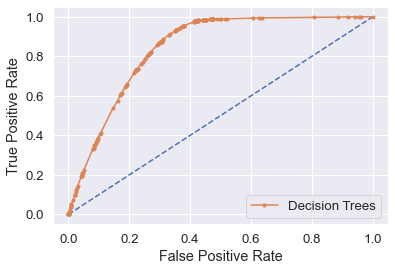

In [52]:
fpr, tpr, thresholds = plot_rocCurve(y_cv, y_pred_cv_proba, model='Decision Trees')

In [53]:
best_threshold(fpr, tpr, thresholds)

0.14036172515071882

In [54]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

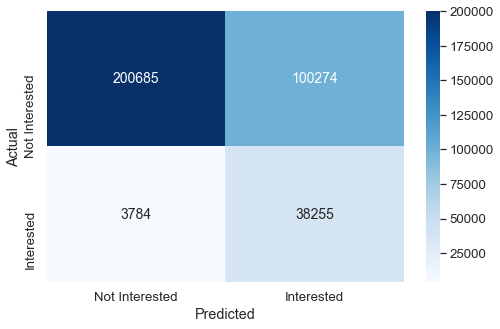

In [55]:
plot_confMatrix(y_train, y_train_pred)

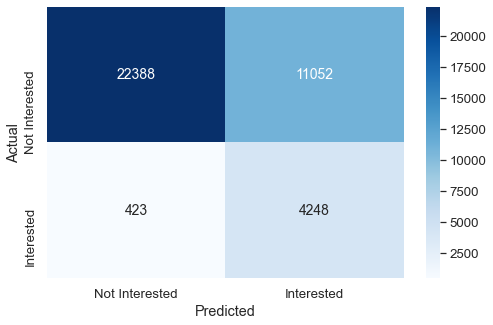

In [56]:
plot_confMatrix(y_cv, y_cv_pred)

In [58]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.98      0.67      0.79    300959
    Interested       0.28      0.91      0.42     42039

      accuracy                           0.70    342998
     macro avg       0.63      0.79      0.61    342998
  weighted avg       0.90      0.70      0.75    342998

CV                 precision    recall  f1-score   support

Not Interested       0.98      0.67      0.80     33440
    Interested       0.28      0.91      0.43      4671

      accuracy                           0.70     38111
     macro avg       0.63      0.79      0.61     38111
  weighted avg       0.90      0.70      0.75     38111

AUC= 0.8422150307199365


### Neural network for complex function representations:

In [69]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['AUC'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               13400     
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0

In [70]:
history = model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, use_multiprocessing=True)

Epoch 1/10
1340/1340 [==============================] - 12s 7ms/step - loss: 0.2819 - auc: 0.8325
Epoch 2/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2785 - auc: 0.8387
Epoch 3/10
1340/1340 [==============================] - 14s 10ms/step - loss: 0.2781 - auc: 0.8393
Epoch 4/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2776 - auc: 0.8403
Epoch 5/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2773 - auc: 0.8408
Epoch 6/10
1340/1340 [==============================] - 13s 10ms/step - loss: 0.2771 - auc: 0.8412
Epoch 7/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2769 - auc: 0.8418
Epoch 8/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2770 - auc: 0.8413
Epoch 9/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2767 - auc: 0.8422
Epoch 10/10
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2766 - auc: 0.8425


In [71]:
y_pred_train_proba = model.predict(X_train)
y_pred_cv_proba = model.predict(X_cv)

0.8466154608184705


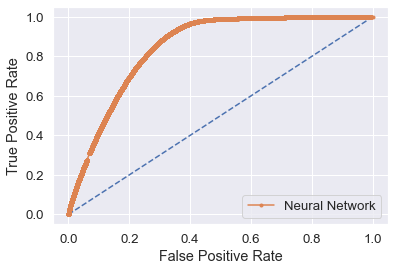

In [72]:
fpr, tpr, thresholds = plot_rocCurve(y_train, y_pred_train_proba, model='Neural Network')

In [73]:
best_threshold(fpr, tpr, thresholds)

0.1352146

In [74]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

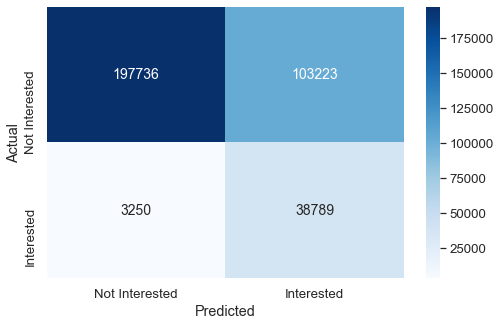

In [75]:
plot_confMatrix(y_train, y_train_pred)

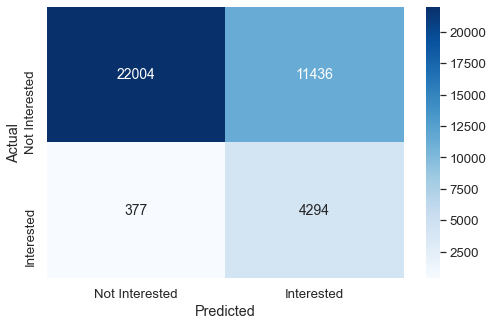

In [76]:
plot_confMatrix(y_cv, y_cv_pred)

In [77]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.98      0.66      0.79    300959
    Interested       0.27      0.92      0.42     42039

      accuracy                           0.69    342998
     macro avg       0.63      0.79      0.60    342998
  weighted avg       0.90      0.69      0.74    342998

CV                 precision    recall  f1-score   support

Not Interested       0.98      0.66      0.79     33440
    Interested       0.27      0.92      0.42      4671

      accuracy                           0.69     38111
     macro avg       0.63      0.79      0.60     38111
  weighted avg       0.90      0.69      0.74     38111

AUC= 0.8423167508161425


### Ensemble Feature based: Random Forest

In [78]:
param_grid = {"max_depth":[10, 30, 75, 100], "min_samples_split":[500, 1000, 5000], \
             'n_estimators':[10, 25, 50]}

RF = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(RF, param_grid, cv = 3, scoring='roc_auc')
grid_pipeline = Pipeline(steps=[('gridSearch', grid_search)])
grid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gridSearch',
                 GridSearchCV(cv=3,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': [10, 30, 75, 100],
                                          'min_samples_split': [500, 1000,
                                                                5000],
                                          'n_estimators': [10, 25, 50]},
                              scoring='roc_auc'))])

In [79]:
RF = RandomForestClassifier(max_depth=grid_pipeline['gridSearch'].best_params_['max_depth'], \
                            min_samples_split=grid_pipeline['gridSearch'].best_params_['min_samples_split'],\
                           n_estimators=grid_pipeline['gridSearch'].best_params_['n_estimators'])
trained_pipeline = Pipeline(steps=[('RF classifier', RF)])
trained_pipeline.fit(X_train, y_train)

Pipeline(steps=[('RF classifier',
                 RandomForestClassifier(max_depth=30, min_samples_split=500,
                                        n_estimators=50))])

In [80]:
y_pred_train_proba = trained_pipeline.predict_proba(X_train)[:, 1]
y_pred_cv_proba = trained_pipeline.predict_proba(X_cv)[:, 1]

0.8454585403779198


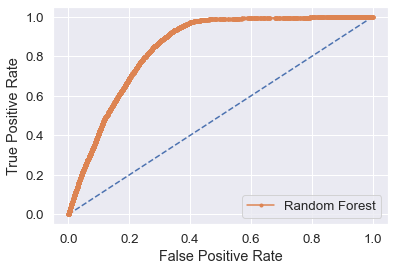

In [81]:
fpr, tpr, thresholds = plot_rocCurve(y_cv, y_pred_cv_proba, model='Random Forest')

In [82]:
best_threshold(fpr, tpr, thresholds)

0.12999414856170188

In [83]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

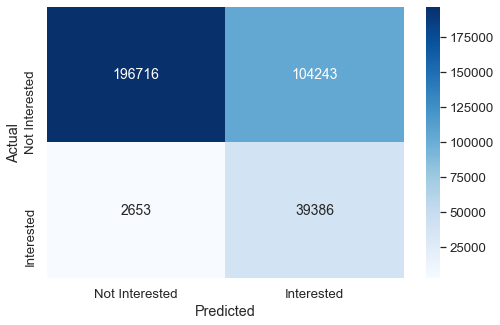

In [84]:
plot_confMatrix(y_train, y_train_pred)

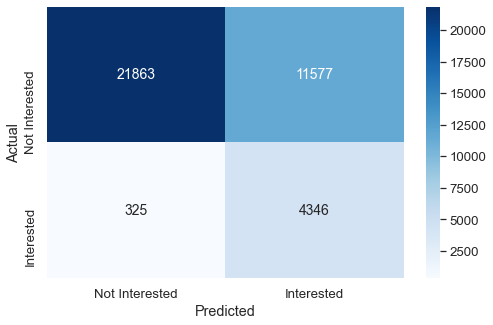

In [85]:
plot_confMatrix(y_cv, y_cv_pred)

In [86]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.99      0.65      0.79    300959
    Interested       0.27      0.94      0.42     42039

      accuracy                           0.69    342998
     macro avg       0.63      0.80      0.61    342998
  weighted avg       0.90      0.69      0.74    342998

CV                 precision    recall  f1-score   support

Not Interested       0.99      0.65      0.79     33440
    Interested       0.27      0.93      0.42      4671

      accuracy                           0.69     38111
     macro avg       0.63      0.79      0.60     38111
  weighted avg       0.90      0.69      0.74     38111

AUC= 0.8454585403779198


### Ensemble Gradient based: Extreme gradient boosting

In [312]:
param_grid = {'n_estimators' : [100, 200, 300, 400, 500, 600], 'max_depth' : [5, 20, 50],
                'learning_rate' : [0.1, 0.5, 1.0]}

XGB = XGBClassifier(tree_method='gpu_hist', eval_metric='auc')


grid_search = GridSearchCV(XGB, param_grid, cv = 3, scoring='roc_auc')
grid_pipeline = Pipeline(steps=[('gridSearch', grid_search)])
grid_pipeline.fit(X_train, y_train)

Pipeline(steps=[('gridSearch',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      eval_metric='auc',
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                             

In [313]:
XGB = XGBClassifier(n_estimators=grid_pipeline['gridSearch'].best_params_['n_estimators'], \
                            max_depth=grid_pipeline['gridSearch'].best_params_['max_depth'],\
                              learning_rate=grid_pipeline['gridSearch'].best_params_['learning_rate'])
trained_pipeline = Pipeline(steps=[('XGBoost classifier', XGB)])
trained_pipeline.fit(X_train, y_train)

[01:31:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('XGBoost classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [314]:
y_pred_train_proba = trained_pipeline.predict_proba(X_train)[:, 1]
y_pred_cv_proba = trained_pipeline.predict_proba(X_cv)[:, 1]

0.8509192261065169


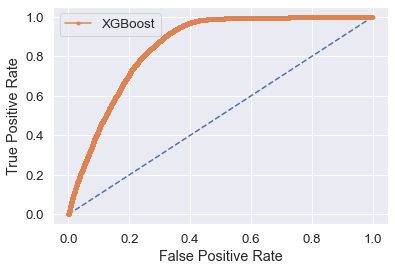

In [315]:
fpr, tpr, thresholds = plot_rocCurve(y_cv, y_pred_cv_proba, model='XGBoost')

In [316]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

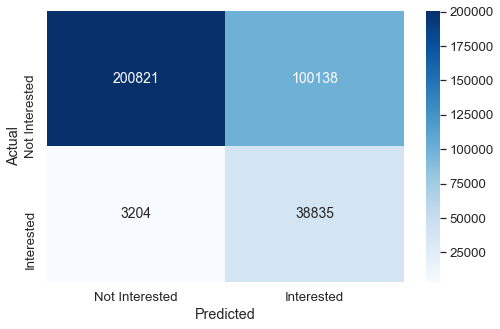

In [317]:
plot_confMatrix(y_train, y_train_pred)

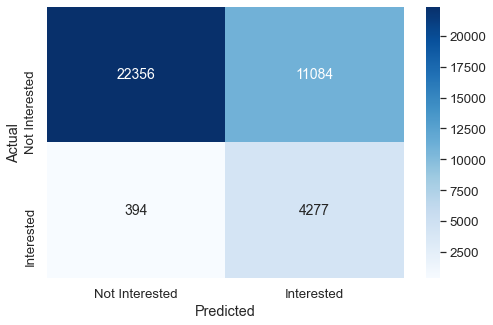

In [318]:
plot_confMatrix(y_cv, y_cv_pred)

In [319]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.98      0.67      0.80    300959
    Interested       0.28      0.92      0.43     42039

      accuracy                           0.70    342998
     macro avg       0.63      0.80      0.61    342998
  weighted avg       0.90      0.70      0.75    342998

CV                 precision    recall  f1-score   support

Not Interested       0.98      0.67      0.80     33440
    Interested       0.28      0.92      0.43      4671

      accuracy                           0.70     38111
     macro avg       0.63      0.79      0.61     38111
  weighted avg       0.90      0.70      0.75     38111

AUC= 0.8509192261065169


In [ ]:
# SAVE THE MODEL HYPER PARAMETERS, FEATURE ENGINEER ON TOP OF THE BEST MODEL! (due to time constraint)

### Performance metric and comparision of models:

Performance metric to simply have an estimation of predicting interested customers, Recall will be used.
To control the false positives, precision will be used. In order to pick with a right balance F1 score will be used.

If business demands that false positives is expensive, then precision will be important. 
If business demands false positives is cheap, then recall will be important.
If business demands false positives and false negatives is expensive, then F1 score will be important.

**Depends on how business wants to sell their vehicle insurance to customers, if the ads are expensive or sending email is cheaper.

__Assumption: Both FP and FN are important and expensive, AUC/F1 score will be performance metric.__


#### Results on CV (Interested class):


* Logistic Regression
    - F1: 42%
    - AUC= 0.8294

* Decision Tree
    - F1: 42%
    - AUC= 0.8422

* Neural network (3-layer)
    - F1: 43%
    - AUC= 0.8423

* Random Forest
    - F1: 42%
    - AUC= 0.8454
   
* XGBOOST
    - F1: 43%
    - AUC= 0.8509

XGBoost is selected for a high AUC %.

#### Model Selected- XGBoost : Performance? Overfitting and/or Underfitting? Interpretability?
Comparing the train and cv results, the model is not overfitting but underfitting on Interested class due to the minority data points.

### Experiments tried:
0. All features, no feature engineering, balancing strategy.
1. Undersampling majority to minority class
2. Undersampling and then oversampling.
3. Removed non-explainable features (variables that didnt impact response variable)

None of them improved a score of 28% Precision, 94% Recall, AUC 

## Feature engineering & Experimentation:

In [112]:
##### plot styling #####
sns.set_style("whitegrid")
sns.set_palette("bright")

### Appling log-transform on numerical features:

<AxesSubplot:xlabel='Age', ylabel='Density'>

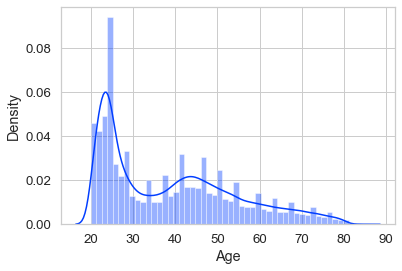

In [113]:
sns.distplot(X.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

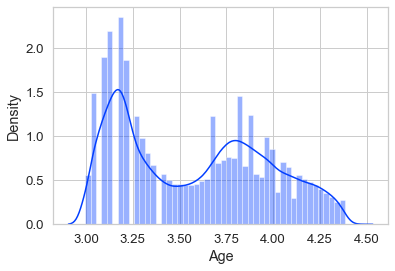

In [115]:
sns.distplot(np.log(X['Age']))

#### Summary of transform:
- The distribution has largly remained the same

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

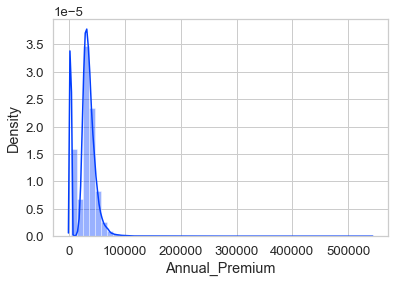

In [118]:
sns.distplot(X.Annual_Premium)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

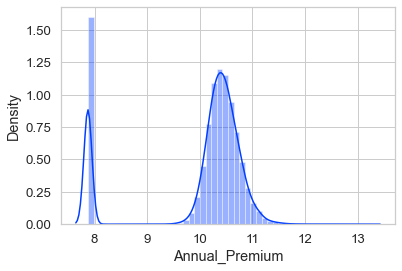

In [119]:
sns.distplot(np.log(X.Annual_Premium))

#### Summary of transform:
- The distribution looks more like normal distribution than a pareto distribution which will be easier to model due to less sharp, dense distribution.
- Use this instead of regular annual premium as feature

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

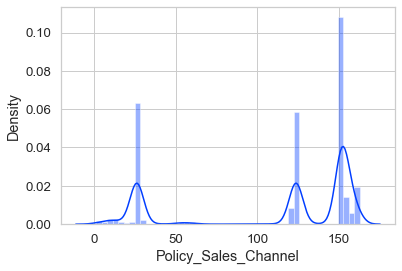

In [123]:
sns.distplot(X.Policy_Sales_Channel)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

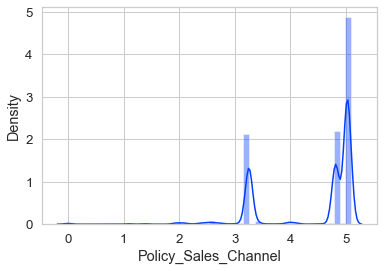

In [124]:
sns.distplot(np.log(X.Policy_Sales_Channel))

#### Summary of transform:

- The distribution was better in more spread out, taking log makes it worse.

<AxesSubplot:xlabel='Age*Policy', ylabel='Density'>

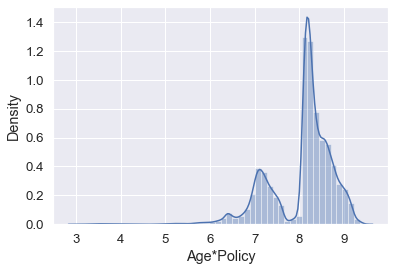

In [552]:
sns.distplot(feature_engg(train_df)['Age*Policy'])

#### Summary of transform:

- Old people are less likely to call and ask for being interested in vehicle insurance, rather visit in-person, compared to youngsters.

In [607]:
def feature_engg(df):
    data = df.copy()
    data['Annual_Premium_log'] = np.log(data['Annual_Premium'])
    data['Age*Policy'] = np.log(data['Age'] * data['Policy_Sales_Channel'])
    return data

In [593]:
train_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [594]:
feature_engg(train_df).head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0            Yes         40454.0                  26.0      217         1   
1             No         33536.0                  26.0      183         0   
2            Yes         38294.0                  26.0       27         1   
3             No         28619.0                 152.0      203         0   
4             No         27496.0                 152.0       39         0   

   Annual_Premium_log  
0           10.607921  
1           10.420375  
2           10.553049  
3           10.261826  
4           10.221796

In [608]:
f_cat_var = ['Gender', 'Driving_License', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
f_num_var = ['Age', 'Annual_Premium_log', 'Policy_Sales_Channel', 'Vintage', 'Previously_Insured', 'Age*Policy']

In [609]:
full_pipeline = ColumnTransformer([("NumericalFeatures", Pipeline([('std', StandardScaler()),]), 
                                    f_num_var),
                                   ("CategoricalFeatures", OneHotEncoder(handle_unknown='ignore'), 
                                    f_cat_var),])

In [610]:
X = feature_engg(train_df)[f_cat_var+f_num_var]
y = feature_engg(train_df).Response.values
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_train = full_pipeline.fit_transform(X_train)
X_cv = full_pipeline.transform(X_cv)

In [611]:
X.columns

Index(['Gender', 'Driving_License', 'Region_Code', 'Vehicle_Age',
       'Vehicle_Damage', 'Age', 'Annual_Premium_log', 'Policy_Sales_Channel',
       'Vintage', 'Previously_Insured', 'Age*Policy'],
      dtype='object')

In [612]:
X.head()

Gender  Driving_License  Region_Code Vehicle_Age Vehicle_Damage  Age  \
0    Male                1         28.0   > 2 Years            Yes   44   
1    Male                1          3.0    1-2 Year             No   76   
2    Male                1         28.0   > 2 Years            Yes   47   
3    Male                1         11.0    < 1 Year             No   21   
4  Female                1         41.0    < 1 Year             No   29   

   Annual_Premium_log  Policy_Sales_Channel  Vintage  Previously_Insured  \
0           10.607921                  26.0      217                   0   
1           10.420375                  26.0      183                   0   
2           10.553049                  26.0       27                   0   
3           10.261826                 152.0      203                   1   
4           10.221796                 152.0       39                   1   

   Age*Policy  
0    7.042286  
1    7.588830  
2    7.108244  
3    8.068403  
4    8.391176

In [613]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, 
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None)



trained_pipeline = Pipeline(steps=[('XGBoost', XGB)])
trained_pipeline.fit(X_train, y_train)

y_pred_train_proba = trained_pipeline.predict_proba(X_train)[:, 1]
y_pred_cv_proba = trained_pipeline.predict_proba(X_cv)[:, 1]

[02:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.860937450383564


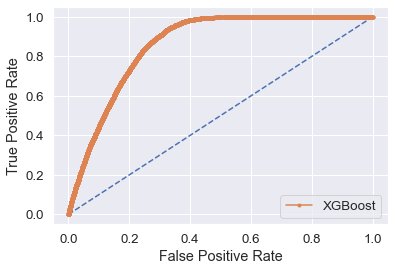

In [614]:
fpr, tpr, thresholds = plot_rocCurve(y_cv, y_pred_cv_proba, model='XGBoost')

In [615]:
y_train_pred = proba_to_preds(y_pred_train_proba, best_threshold(fpr, tpr, thresholds))
y_cv_pred = proba_to_preds(y_pred_cv_proba, best_threshold(fpr, tpr, thresholds))

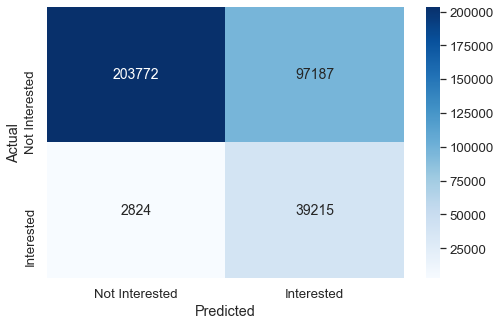

In [616]:
plot_confMatrix(y_train, y_train_pred)

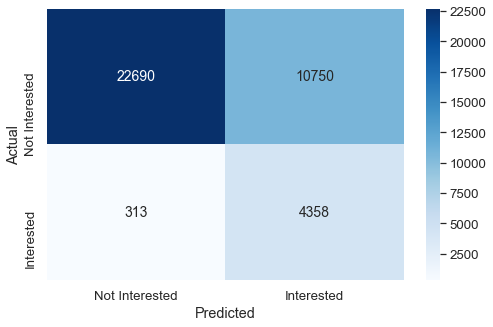

In [617]:
plot_confMatrix(y_cv, y_cv_pred)

In [618]:
print('Train',classification_report(y_train, y_train_pred, target_names=target_names))
print('CV', classification_report(y_cv, y_cv_pred, target_names=target_names))
print('AUC=', roc_auc_score(y_cv, y_pred_cv_proba))

Train                 precision    recall  f1-score   support

Not Interested       0.99      0.68      0.80    300959
    Interested       0.29      0.93      0.44     42039

      accuracy                           0.71    342998
     macro avg       0.64      0.80      0.62    342998
  weighted avg       0.90      0.71      0.76    342998

CV                 precision    recall  f1-score   support

Not Interested       0.99      0.68      0.80     33440
    Interested       0.29      0.93      0.44      4671

      accuracy                           0.71     38111
     macro avg       0.64      0.81      0.62     38111
  weighted avg       0.90      0.71      0.76     38111

AUC= 0.860937450383564


# Model Interpretation:

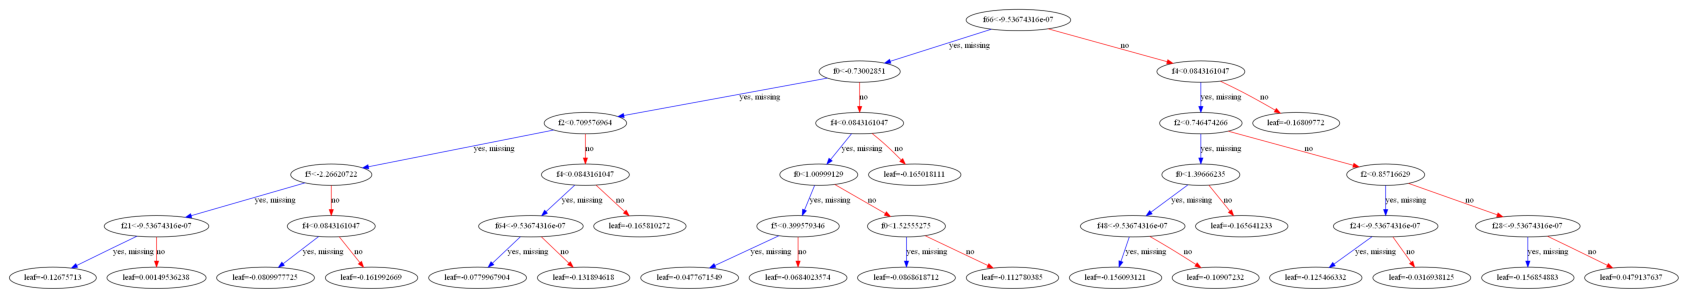

In [711]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(XGB, num_trees=2, ax=ax)
plt.savefig("temp.pdf")
plt.show()

In [641]:
all_feats = f_num_var + full_pipeline.transformers_[1][1].get_feature_names(f_cat_var).tolist()

In [642]:
all_feats

['Age',
 'Annual_Premium_log',
 'Policy_Sales_Channel',
 'Vintage',
 'Previously_Insured',
 'Age*Policy',
 'Gender_Female',
 'Gender_Male',
 'Driving_License_0',
 'Driving_License_1',
 'Region_Code_0.0',
 'Region_Code_1.0',
 'Region_Code_2.0',
 'Region_Code_3.0',
 'Region_Code_4.0',
 'Region_Code_5.0',
 'Region_Code_6.0',
 'Region_Code_7.0',
 'Region_Code_8.0',
 'Region_Code_9.0',
 'Region_Code_10.0',
 'Region_Code_11.0',
 'Region_Code_12.0',
 'Region_Code_13.0',
 'Region_Code_14.0',
 'Region_Code_15.0',
 'Region_Code_16.0',
 'Region_Code_17.0',
 'Region_Code_18.0',
 'Region_Code_19.0',
 'Region_Code_20.0',
 'Region_Code_21.0',
 'Region_Code_22.0',
 'Region_Code_23.0',
 'Region_Code_24.0',
 'Region_Code_25.0',
 'Region_Code_26.0',
 'Region_Code_27.0',
 'Region_Code_28.0',
 'Region_Code_29.0',
 'Region_Code_30.0',
 'Region_Code_31.0',
 'Region_Code_32.0',
 'Region_Code_33.0',
 'Region_Code_34.0',
 'Region_Code_35.0',
 'Region_Code_36.0',
 'Region_Code_37.0',
 'Region_Code_38.0',
 'Regio

In [660]:
results = pd.DataFrame()
results['Features'] = all_feats
results['Importances'] = XGB.feature_importances_
results.sort_values(by='Importances',ascending=False,inplace=True)
results = results.reset_index(drop=True)

<AxesSubplot:xlabel='Importances', ylabel='Features'>

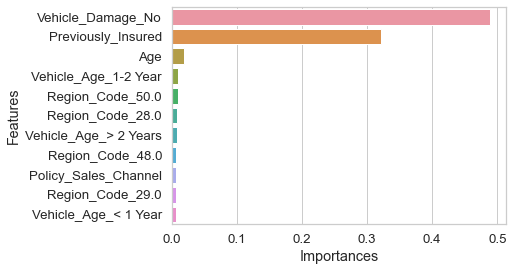

In [662]:
sns.barplot(data=results.iloc[:11], x='Importances', y='Features')

#### Summary:

- The features with high importances also have a strong indication to classify.

## Explaining test predictions

In [675]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=all_feats, 
                                                   class_names=['Not Interested', 'Interested'], 
                                                   verbose=True, mode='classification')

In [677]:
y_cv[0]

0

In [676]:
exp = explainer.explain_instance(X_cv[0], XGB.predict_proba, num_features=68)
exp.show_in_notebook(show_table=True)

Intercept 0.08406633083012852
Prediction_local [0.04949664]
Right: 0.028768275


## Post Prediction Analysis to check for data drift

In [625]:
##### plot styling #####
sns.set_style("whitegrid")
sns.set_palette("bright")

In [626]:
test_df = pd.read_csv('test.csv')

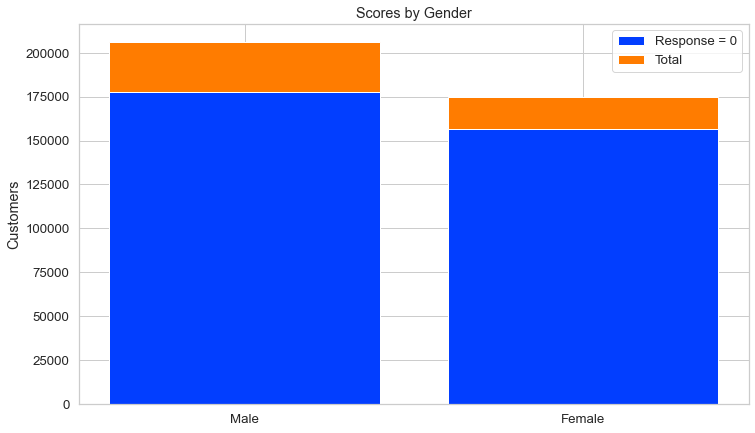

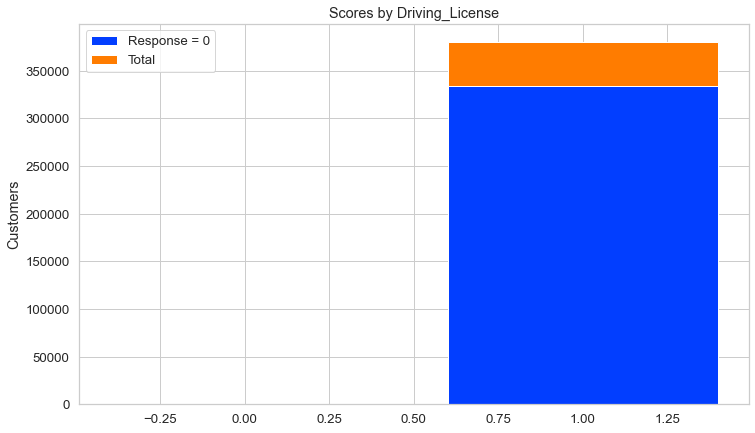

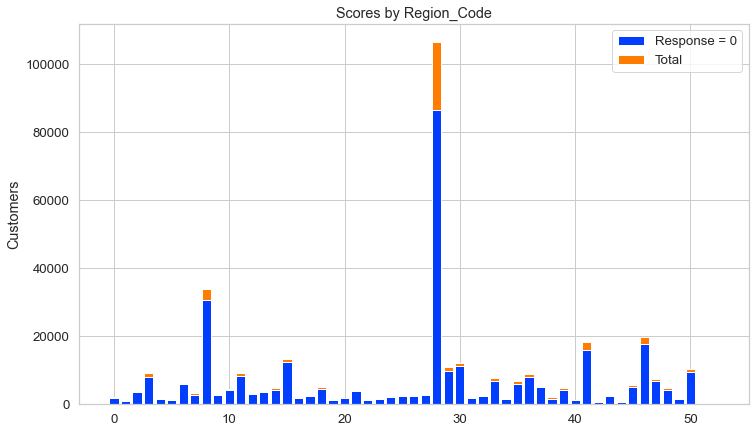

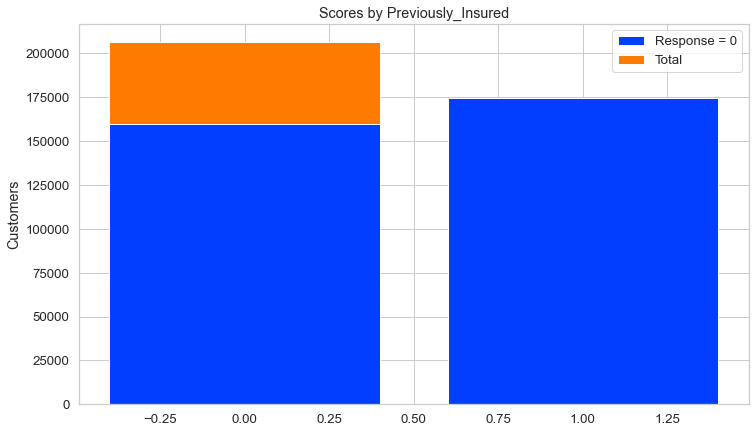

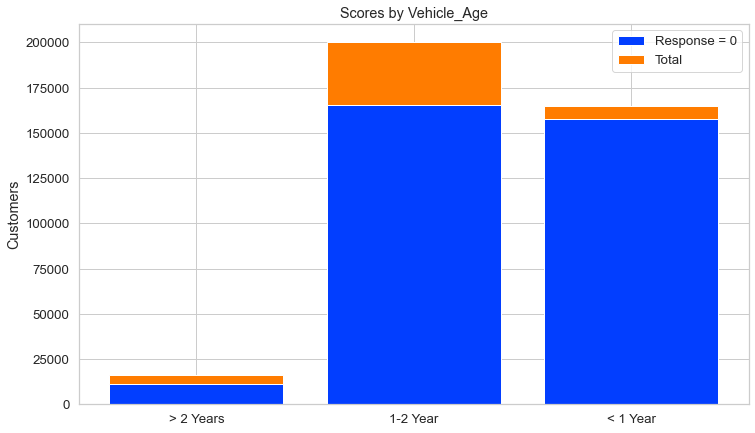

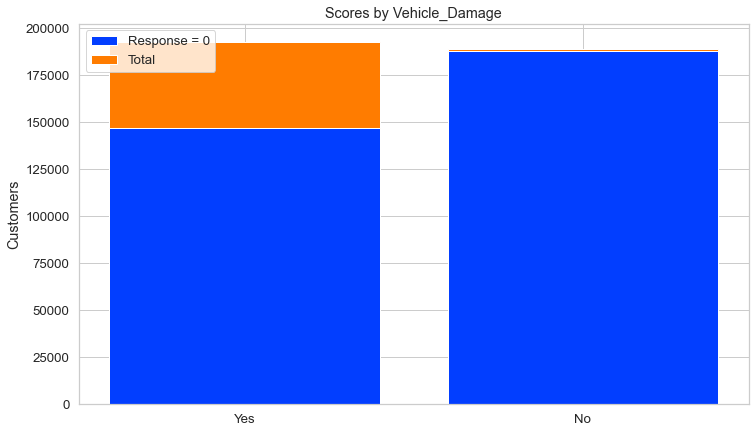

In [627]:
for cats in cat_var:
    plot_categorical(cats)

Medians for Interested and non-interested customers:
43.0 34.0
Averages for Interested and non-interested customers:
43.435559837293944 38.17822720761725


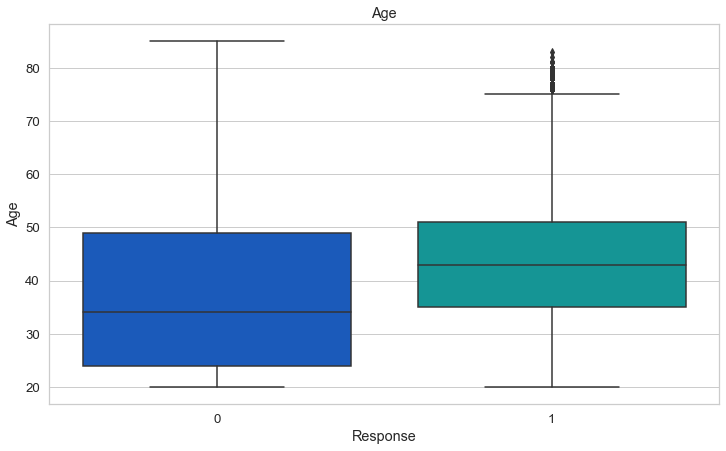

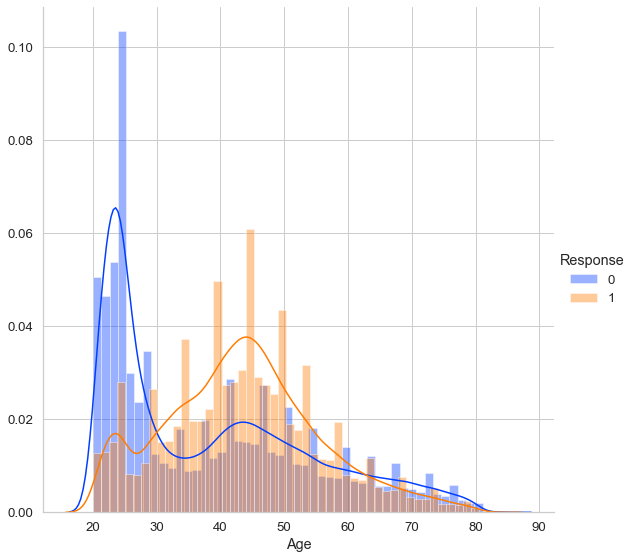

Medians for Interested and non-interested customers:
33002.0 31504.0
Averages for Interested and non-interested customers:
31604.092742453435 30419.16027559891


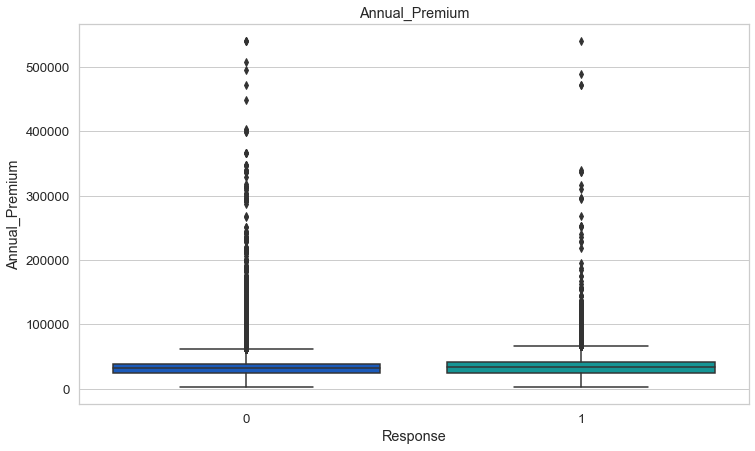

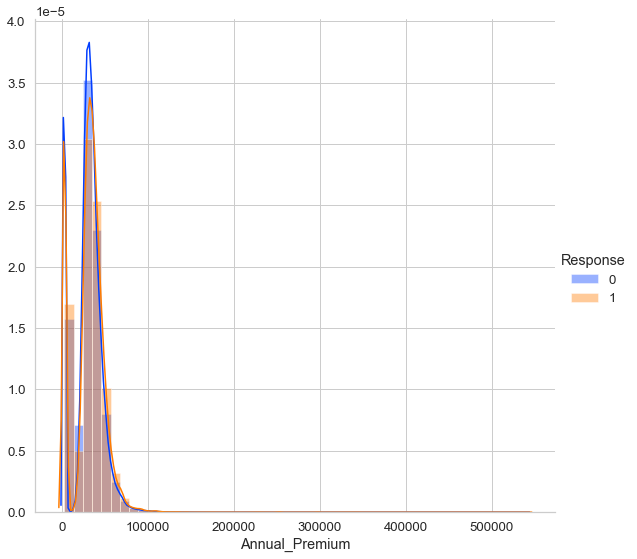

Medians for Interested and non-interested customers:
124.0 152.0
Averages for Interested and non-interested customers:
91.86908584885464 114.85104022440258


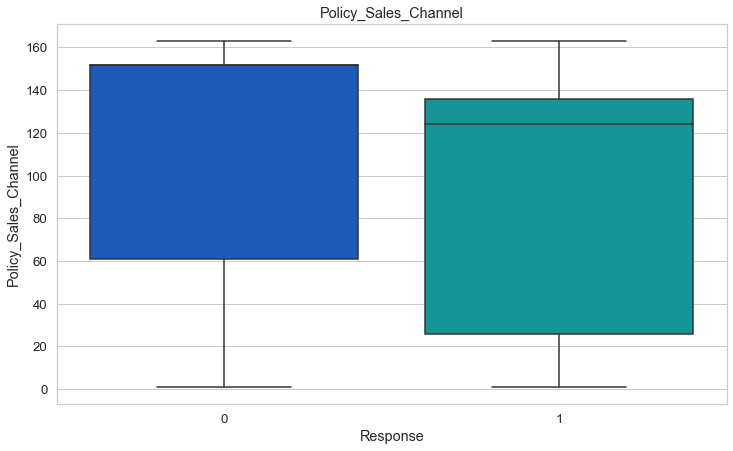

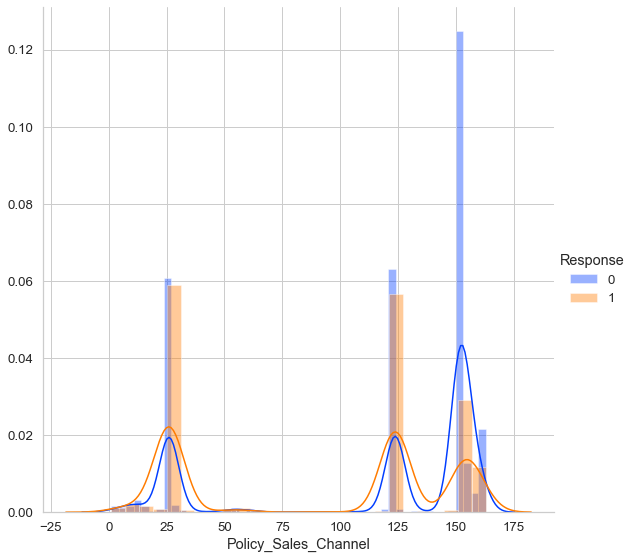

Medians for Interested and non-interested customers:
154.0 154.0
Averages for Interested and non-interested customers:
154.11224577178334 154.38024336197176


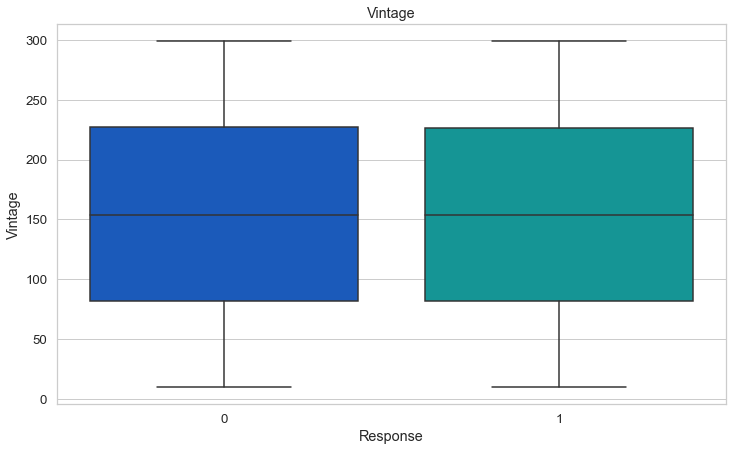

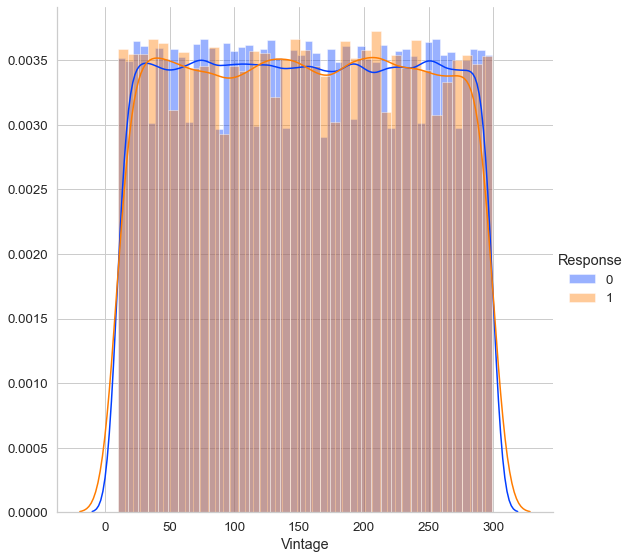

In [628]:
for num in num_var:
    numerical_outlier(num)

#### The same is observed in train data, no data drift

# Next Steps/ Suggestions:

* Feature engineer further and experiement for higher F1/AUC score.
* More EDA understanding to a higher level of domain understanding.
* More details on __Error Analysis__ on model predictions.
* Team discussion.
* Deployment after strong series of data science lifecycle checks.
